# BE223A 2019 Project Pipeline

In [1]:
import os, sys
import pandas as pd
import numpy as np

# CT Skull Segmentation
sys.path.append('CT_Segmentation')
import CT_Segmentation.segment_skull as sk

# Fluoro Pin tip extraction
import Fluoro_Segmentation.pin_tips_extract as ptx

## Inputs

To load data of patient:

1. Root is the current directory where 'Consolidated_pipeline.ipynb' sits
2. There is a folder called 'data', please place patient data in that folder.
3. For variable 'subject', please replace FOLDER with folder name of where subject's files are stored
4. Please input appropriate filename in place of CT_PLACEHOLDER for the preop CT. Include the extension (eg '.nii')
5. Please input appropriate filename in place of FLUORO_PLACEHOLDER for the fluoroscopy image. Include the extension (eg '.tif')
6. Please input appropriate filename in place of HULL_PLACEHOLDER for the hull. Include the extension (eg '.mat')

In [8]:
root_data_dir = root_data_dir=os.path.join(os.getcwd(),'data') # Change for different systems
subjects = os.listdir(root_data_dir)
subject = 'FOLDER'

preop_ct_filename = "CT_PLACEHOLDER"
preop_CT_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        preop_ct_filename
    )
)

fluoro_filename = "FLUORO_PLACEHOLDER"
fluoro_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        fluoro_filename
    )
)

hull_filename = "HULL_PLACEHOLDER"
hull_mat_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        hull_filename
    )
)

In [2]:
root_data_dir = root_data_dir=os.path.join(os.getcwd(),'data') # Change for different systems
subjects = os.listdir(root_data_dir)
subject = 'subject_1'

preop_ct_filename = "preopCT_subject_1.nii"
preop_CT_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        preop_ct_filename
    )
)

fluoro_filename = "fluoro_subject_1.tif"
fluoro_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        fluoro_filename
    )
)

hull_filename = "hull.mat"
hull_mat_path = os.path.join(
    root_data_dir,
    os.path.join(
        subject,
        hull_filename
    )
)

## Fluoro segmentation

In [3]:
fluro_object = ptx.PinTips(fluoro_path)
pin_coord = fluro_object.extract_pin()

C:\Users\hwz62\Anaconda3\lib\site-packages\skimage\external\tifffile\tifffile.py:2616: RuntimeWarning: py_decodelzw encountered unexpected end of stream
  strip = decompress(strip)


## CT Segmentation


LOADING CT

LOADING HULL

CREATING CONVEX HULL

NORMALIZING AND RESHAPING CT DATA
Normalizing from: -1601.8297119140625 3584.31884765625
To range: 0.0 1.0


| |         #                                   | 7026346 Elapsed Time: 0:00:35
 30% (16349 of 53814) |#####             | Elapsed Time: 0:00:00 ETA:   0:00:00


SCALING HULL
[140.86661699 105.81296572  89.16020864]


100% (53814 of 53814) |##################| Elapsed Time: 0:00:00 Time:  0:00:00



FILTERING CT FOR REGIONS OUTSIDE ORIGINAL HULL
...Splitting data in to chunks
	Done. Chunks created: 70263
...Creating inputs


  0% (30 of 70263) |                     | Elapsed Time: 0:00:00 ETA:   0:03:58

	Done
...Computing if chunks in Hull


100% (70263 of 70263) |##################| Elapsed Time: 0:03:41 Time:  0:03:41
N/A% (0 of 56595) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--


FILTERING CT FOR REGIONS INSIDE SCALED HULL
...Splitting data in to chunks
	Done. Chunks created: 56595
...Creating inputs
	Done
...Computing if chunks in Hull


100% (56595 of 56595) |##################| Elapsed Time: 0:03:00 Time:  0:03:00



GET CURVATURE OF SKULL


| |                     #                        | 389841 Elapsed Time: 0:00:02
100% (1947 of 1947) |####################| Elapsed Time: 0:00:00 Time:  0:00:00



FILTERING CT FOR UPPER REGIONS USED IN CT

SHOWING PREVIEW


CT_Segmentation\helper_functions\reshape_data.py:83: RuntimeWarning: Mean of empty slice
  projection = np.nanmean(ct_data, axis=axis)


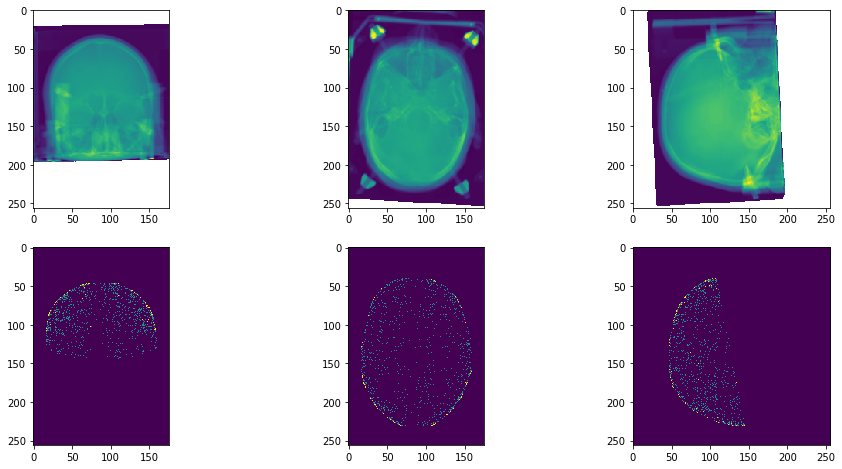


SAVING SKULL VERTICES OUTPUT TO: data\subject_1\subject_1_skull.nii

 CREATING INTERMEDIARY FOR PIN TIP SEGMENTATION

	SAVING DENSE SKULL INTERMEDIARY OUTPUT TO: data\subject_1\subject_1_dense_skull.nii
Time elapsed (minutes):  7.441832121213277


In [5]:
import importlib
importlib.reload(sk)
skull_vertices, dense_skull = sk.segment_skull(
    preop_CT_path, hull_mat_path, 
    os.path.join('data',subject),
    subject, 
    preview=True, 
    chunk_size=100, 
    save=True,
)

## Pintip Segmentation

In [17]:
import PIN_FUNCTIONS as pinct

pinct.get_pin_locations(
    root_data_dir,
    os.path.join(root_data_dir,subject),
    os.path.join(root_data_dir,subject)
)

AttributeError: module 'PIN_FUNCTIONS' has no attribute 'get_pin_locations'

## Electrode Segmentation



In [11]:
import Electrode_Segmentation.electrode_segmentation2 as electrode
import numpy as np

save_path=os.path.join('data',subject,'electrode.txt')
out=electrode.electrode_detection(np.array(fluoro_path),save_path)



ValueError: The parameter `image` must be a 2-dimensional array

In [12]:
print(fluoro_path)

C:\Users\hwz62\Desktop\a3\data\subject_1\fluoro_subject_1.tif
